In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [3]:
train_dir = "/kaggle/input/digit-recognizer/train.csv"

train_df = pd.read_csv(train_dir)
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# # split the train data into features and labels
X_train = train_df.drop("label", axis=1).values
y_train = train_df["label"].values
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

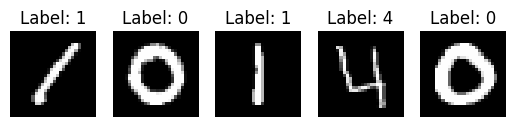

In [5]:
# # display 5 images
import matplotlib.pyplot as plt
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train.reshape(-1, 28, 28)[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

In [6]:
# split the train set into train and validation set
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(train_df, test_size=0.1, random_state=42)
len(train_data), len(val_data)

(37800, 4200)

In [7]:
val_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16041,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4867,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28123,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3780,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train = train_data.drop("label", axis=1).values.reshape(-1, 28, 28, 1)
y_train = train_data["label"]

X_val = val_data.drop("label", axis=1).values.reshape(-1, 28, 28, 1)
y_val = val_data["label"]

In [9]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800,), (4200,))

In [10]:
y_train

22460    8
20828    5
32032    6
6194     2
12768    2
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 37800, dtype: int64

In [11]:
# convert the labels into 1 hot encoded
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)

In [12]:
y_train[0] # should be #8

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [13]:
y_val = to_categorical(y_val, num_classes=10)

In [14]:
y_val[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1, 
    height_shift_range=0.1)

val_test_datagen = ImageDataGenerator(
    rescale=1/255.)

In [16]:
# train_data = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(28, 28),
#     batch_size=32,
#     class_mode="categorical",
#     seed=42)
train_data = train_datagen.flow(
    X_train,
    y_train,
    batch_size=32,
    seed=42)
val_data = val_test_datagen.flow(
    X_val,
    y_val,
    batch_size=32,
    seed=42)

In [17]:
train_data[0][0].shape

(32, 28, 28, 1)

In [18]:
val_data[0][0].shape

(32, 28, 28, 1)

## Create first model

In [19]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 5, activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 5, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["Accuracy"])


In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 10)          2510      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 10)                1

In [21]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                      patience=3,
                                                      restore_best_weights=True)

In [22]:
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                         patience=2,
                                                         factor=0.2,
                                                         min_lr=0.0001)

In [23]:
history_1 = model_1.fit(train_data,
                       epochs=20,
                       steps_per_epoch=len(train_data),
                       validation_data=val_data,
                       validation_steps=len(val_data),
                       callbacks=[early_stop_callback, reduce_lr_callback])

Epoch 1/20
1182/1182 [==============================] - 16s 13ms/step - loss: 0.6391 - Accuracy: 0.7989 - val_loss: 0.1766 - val_Accuracy: 0.9469 - lr: 0.0010
Epoch 2/20
1182/1182 [==============================] - 15s 13ms/step - loss: 0.2761 - Accuracy: 0.9172 - val_loss: 0.1220 - val_Accuracy: 0.9638 - lr: 0.0010
Epoch 3/20
1182/1182 [==============================] - 16s 13ms/step - loss: 0.2207 - Accuracy: 0.9325 - val_loss: 0.0861 - val_Accuracy: 0.9752 - lr: 0.0010
Epoch 4/20
1182/1182 [==============================] - 15s 13ms/step - loss: 0.1838 - Accuracy: 0.9458 - val_loss: 0.0753 - val_Accuracy: 0.9776 - lr: 0.0010
Epoch 5/20
1182/1182 [==============================] - 15s 13ms/step - loss: 0.1691 - Accuracy: 0.9490 - val_loss: 0.0821 - val_Accuracy: 0.9726 - lr: 0.0010
Epoch 6/20
1182/1182 [==============================] - 15s 12ms/step - loss: 0.1513 - Accuracy: 0.9545 - val_loss: 0.0600 - val_Accuracy: 0.9819 - lr: 0.0010
Epoch 7/20
1182/1182 [========================

In [24]:
model_1.evaluate(val_data)

132/132 [==============================] - 1s 5ms/step - loss: 0.0344 - Accuracy: 0.9881


[0.03443814441561699, 0.988095223903656]

In [25]:
print(history_1.history.keys())

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy', 'lr'])


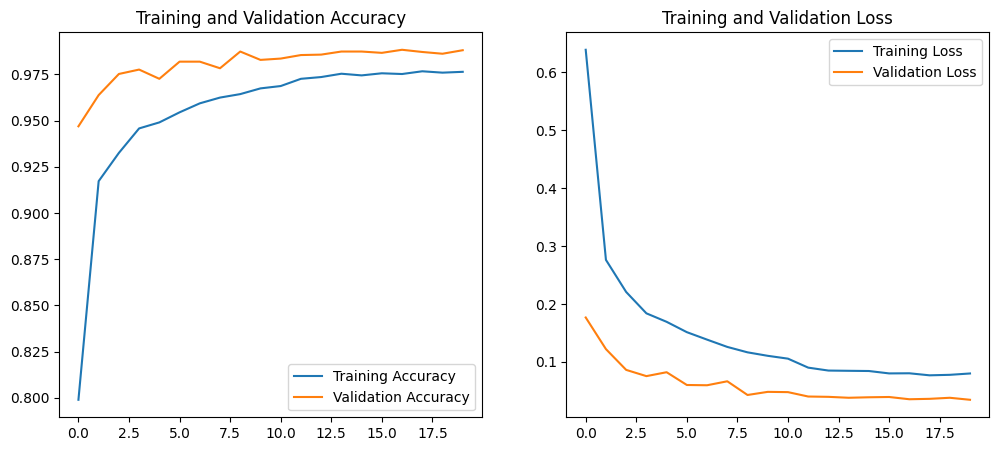

In [26]:
import matplotlib.pyplot as plt

acc = history_1.history['Accuracy']
val_acc = history_1.history['val_Accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [27]:
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
predictions = model_1.predict(test_df.values.reshape(-1, 28, 28, 1))

875/875 [==============================] - 4s 4ms/step


In [29]:
predicted_labels = predictions.argmax(axis=1)

In [30]:
submission_df = pd.DataFrame({
    'ImageId': range(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})
submission_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [31]:
submission_df.to_csv("submission.csv", index=False)

Can train for longer but going to try a different model type

## Model 2

In [32]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 5, activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(10, 5, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss="categorical_crossentropy",
             optimizer="Adam",
             metrics=["Accuracy"])


In [33]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 10)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 12, 12, 10)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          2510      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 160)              

In [34]:
history_2 = model_2.fit(train_data,
                       epochs=20,
                       steps_per_epoch=len(train_data),
                       validation_data=val_data,
                       validation_steps=len(val_data),
                       callbacks=[early_stop_callback])

Epoch 1/20
1182/1182 [==============================] - 16s 13ms/step - loss: 0.7202 - Accuracy: 0.7653 - val_loss: 0.1854 - val_Accuracy: 0.9450
Epoch 2/20
1182/1182 [==============================] - 16s 13ms/step - loss: 0.3272 - Accuracy: 0.8976 - val_loss: 0.1360 - val_Accuracy: 0.9569
Epoch 3/20
1182/1182 [==============================] - 16s 13ms/step - loss: 0.2655 - Accuracy: 0.9179 - val_loss: 0.1130 - val_Accuracy: 0.9645
Epoch 4/20
1182/1182 [==============================] - 15s 13ms/step - loss: 0.2244 - Accuracy: 0.9319 - val_loss: 0.0914 - val_Accuracy: 0.9743
Epoch 5/20
1182/1182 [==============================] - 16s 13ms/step - loss: 0.1992 - Accuracy: 0.9377 - val_loss: 0.0778 - val_Accuracy: 0.9748
Epoch 6/20
1182/1182 [==============================] - 15s 13ms/step - loss: 0.1797 - Accuracy: 0.9451 - val_loss: 0.0692 - val_Accuracy: 0.9795
Epoch 7/20
1182/1182 [==============================] - 16s 13ms/step - loss: 0.1683 - Accuracy: 0.9484 - val_loss: 0.0711 -

In [35]:
model_2.evaluate(val_data)

132/132 [==============================] - 1s 5ms/step - loss: 0.0403 - Accuracy: 0.9860


[0.04033306613564491, 0.9859523773193359]

In [36]:
model_1.evaluate(val_data)

132/132 [==============================] - 1s 4ms/step - loss: 0.0344 - Accuracy: 0.9881


[0.03443814069032669, 0.988095223903656]

In [37]:
# import tensorflow_hub as hub
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

# # feature_extractor_layer = hub.KerasLayer(efficientnet_url,
# #                                         trainable=False,
# #                                         name="feature_extraction_layer",
# #                                         input_shape=(28, 28, 1))


# inputs = tf.keras.layers.Input(shape=(28, 28, 1))

# x = tf.keras.layers.Conv2D(10, 3, activation="relu")(inputs)

# # x = tf.keras.layers.UpSampling2D(size=(96//28, 96//28))(x)

# # base_model = tf.keras.applications.MobileNet(weights='imagenet', input_shape=(96, 96, 3), include_top=False)
# # x = base_model(x, training=False)

# # x = tf.keras.layers.GlobalAveragePooling2D()(x)

# outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

# model_2 = tf.keras.Model(inputs, outputs)

# # model_2 = tf.keras.Sequential([
# #     tf.keras.layers.Resizing(224, 224),
# #     feature_extractor_layer,
# #     tf.keras.layers.Dense(10, activation="softmax", name="output_layer")
# # ])

# model_2.compile(loss="categorical_crossentropy",
#              optimizer="Adam",
#              metrics=["Accuracy"])

In [38]:
# model_2.summary()

In [39]:
# history_2 = model_2.fit(train_data,
#                        epochs=8,
#                        steps_per_epoch=len(train_data),
#                        validation_data=val_data,
#                        validation_steps=len(val_data))